### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr
# key=""

In [2]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
# df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-13 00:00:00+00:00,156.99,157.28,156.41,156.73,16287608,37.246402,37.315206,37.108795,37.184716,65150432,0.0,1.0
1,AAPL,2017-10-16 00:00:00+00:00,159.88,160.00,157.65,157.90,23894630,37.932064,37.960535,37.402990,37.462303,95578520,0.0,1.0
2,AAPL,2017-10-17 00:00:00+00:00,160.47,160.87,159.23,159.78,18816438,38.072044,38.166945,37.777850,37.908339,75265752,0.0,1.0
3,AAPL,2017-10-18 00:00:00+00:00,159.76,160.71,159.60,160.42,16158659,37.903594,38.128985,37.865634,38.060181,64634636,0.0,1.0
4,AAPL,2017-10-19 00:00:00+00:00,155.98,157.08,155.02,156.75,42111326,37.006776,37.267755,36.779013,37.189462,168445304,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-10-05 00:00:00+00:00,146.40,147.38,143.0100,144.075,79470968,146.40,147.38,143.0100,144.075,79470968,0.0,1.0
1253,AAPL,2022-10-06 00:00:00+00:00,145.43,147.54,145.2200,145.810,68402169,145.43,147.54,145.2200,145.810,68402169,0.0,1.0
1254,AAPL,2022-10-07 00:00:00+00:00,140.09,143.10,139.4450,142.540,85925559,140.09,143.10,139.4450,142.540,85925559,0.0,1.0
1255,AAPL,2022-10-10 00:00:00+00:00,140.42,141.89,138.5729,140.420,74899002,140.42,141.89,138.5729,140.420,74899002,0.0,1.0
1256,AAPL,2022-10-11 00:00:00+00:00,138.98,141.35,138.2200,139.900,77033672,138.98,141.35,138.2200,139.900,77033672,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       156.99
1       159.88
2       160.47
3       159.76
4       155.98
         ...  
1252    146.40
1253    145.43
1254    140.09
1255    140.42
1256    138.98
Name: close, Length: 1257, dtype: float64

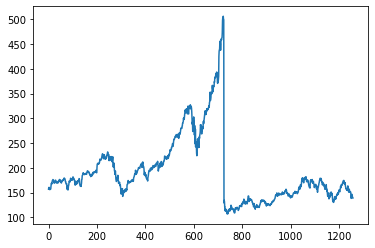

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       156.99
1       159.88
2       160.47
3       159.76
4       155.98
         ...  
1252    146.40
1253    145.43
1254    140.09
1255    140.42
1256    138.98
Name: close, Length: 1257, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.12561052]
 [0.13284909]
 [0.13432686]
 ...
 [0.08328115]
 [0.0841077 ]
 [0.08050094]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [19]:
# train_data

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 100, 100)          20800     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
dense_2 (Dense)              (None, 100, 1)            101       
Total params: 141,701
Trainable params: 141,701
Non-trainable params: 0
_________________________________________________________________


In [33]:
716/64

11.1875

In [42]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0021 - val_loss: 0.0078
Epoch 2/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 4/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 5/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0176 - val_loss: 0.0161
Epoch 6/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0079 - val_loss: 0.0020
Epoch 7/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0065 - val_loss: 0.0080
Epoch 8/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0064 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0052 - val_lo

12/12 [==============================] - 3s 249ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 82/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 83/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 84/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 85/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 86/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0022 - val_loss: 0.0053
Epoch 87/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 88/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 89/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 90/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0018 - val_loss: 

In [47]:
print(history.history['loss'])

[0.0021395236253738403, 0.0019086236134171486, 0.0017076304648071527, 0.0015245425747707486, 0.017570771276950836, 0.007936705835163593, 0.006513487547636032, 0.007834234274923801, 0.006441884208470583, 0.005195266101509333, 0.003876704489812255, 0.0048812879249453545, 0.0043052975088357925, 0.0073503716848790646, 0.007254359312355518, 0.005394098348915577, 0.005510625429451466, 0.005371781997382641, 0.0041356864385306835, 0.0033190236426889896, 0.002981414319947362, 0.0025440617464482784, 0.0035347677767276764, 0.0027657609898597, 0.002328011440113187, 0.002495321910828352, 0.002028163056820631, 0.0019389797234907746, 0.0022589454893022776, 0.004666632506996393, 0.005109955091029406, 0.0028592462185770273, 0.002743264427408576, 0.003254412207752466, 0.0028320394922047853, 0.002608003793284297, 0.0023614808451384306, 0.002111265202984214, 0.001726219430565834, 0.00249250466004014, 0.002049409318715334, 0.002258904743939638, 0.0022910230327397585, 0.0018976377323269844, 0.00191111292224

In [48]:
print(history.history['val_loss'])

[0.007802262902259827, 0.004680945072323084, 0.005427050869911909, 0.0026422941591590643, 0.016081901267170906, 0.001970948651432991, 0.008002256974577904, 0.0032571719493716955, 0.0014219745062291622, 0.0035395885352045298, 0.0034747931640595198, 0.0025277019012719393, 0.00404859846457839, 0.010864152573049068, 0.006243373733013868, 0.005501522216945887, 0.0064502013847231865, 0.008159314282238483, 0.0037502699997276068, 0.004219798371195793, 0.0028773960657417774, 0.005685825832188129, 0.0045461030676960945, 0.004358289297670126, 0.004507571458816528, 0.00795928668230772, 0.004719446878880262, 0.003881563898175955, 0.004354532342404127, 0.010521761141717434, 0.012071645818650723, 0.006135755684226751, 0.0033978901337832212, 0.0020259630400687456, 0.004873131401836872, 0.004335994366556406, 0.003006409853696823, 0.005395893938839436, 0.0035960294771939516, 0.007104009855538607, 0.006038844585418701, 0.003015159862115979, 0.008902539499104023, 0.005864993669092655, 0.001802058657631278

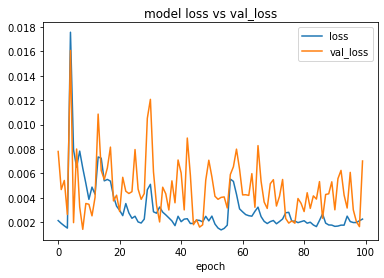

In [49]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss vs val_loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'val_loss'], loc='upper right')
pyplot.show()